In [ ]:
# Name- Pranav Shelke(BE-IT)
# Roll.no- 69
# Assignment No- 02
# Problem Statement-Implementing Feedforward neural networks with Keras and TensorFlow
# a. Import the necessary packages
# b. Load the training and testing data (MNIST/CIFAR10)
# c. Define the network architecture using Keras
# d. Train the model using SGD
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [10]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

11490434/11490434 [==============================] - 57s 5us/step


In [11]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [12]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [16]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [17]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [28]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=10, batch_size=10)

[INFO] training network...
Epoch 1/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3248 - accuracy: 0.9066 - val_loss: 0.3018 - val_accuracy: 0.9140
Epoch 2/10
6000/6000 [==============================] - 28s 5ms/step - loss: 0.3052 - accuracy: 0.9114 - val_loss: 0.2874 - val_accuracy: 0.9173
Epoch 3/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.2903 - accuracy: 0.9159 - val_loss: 0.2752 - val_accuracy: 0.9220
Epoch 4/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.2779 - accuracy: 0.9189 - val_loss: 0.2643 - val_accuracy: 0.9231
Epoch 5/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2665 - accuracy: 0.9225 - val_loss: 0.2558 - val_accuracy: 0.9259
Epoch 6/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2565 - accuracy: 0.9252 - val_loss: 0.2481 - val_accuracy: 0.9281
Epoch 7/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2467 - accuracy: 0.9277 

In [29]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.93      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.94      0.88      0.91       892
           6       0.94      0.95      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.91      0.92      0.92       974
           9       0.92      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Text(0, 0.5, 'Loss/Accuracy')

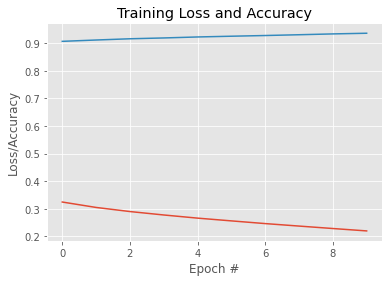

In [30]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")